In [1]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

import numba
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning

warnings.simplefilter("ignore", category=NumbaDeprecationWarning)

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
from scipy.sparse import csr_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import celltypist
from celltypist import models
import scarches as sca
import urllib.request

sc.settings.verbosity = 0 
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)


In order to use sagenet models, please install pytorch geometric (see https://pytorch-geometric.readthedocs.io) and 
 captum (see https://github.com/pytorch/captum).
mvTCR is not installed. To use mvTCR models, please install it first using "pip install mvtcr"
multigrate is not installed. To use multigrate models, please install it first using "pip install multigrate".


In [3]:
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

In [4]:
sc.set_figure_params(figsize=(5,5))

In [5]:
adata = sc.read("clustered_0.h5ad")
adata

AnnData object with n_obs × n_vars = 37407 × 34890
    obs: 'SubID', 'Channel', 'Brain_bank', 'round_num', 'poolID', 'Sex', 'Age', 'Dx_AD', 'Ethnicity', 'pH', 'PMI', 'class', 'subclass', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'scDblFinder_score', 'scDblFinder_class', 'size_factors', 'leiden', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res1'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_deviant', 'binomial_deviance', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_res0_25_colors', 'leiden_res0_5_colors', 'leiden_res1_colors', 'neighbo

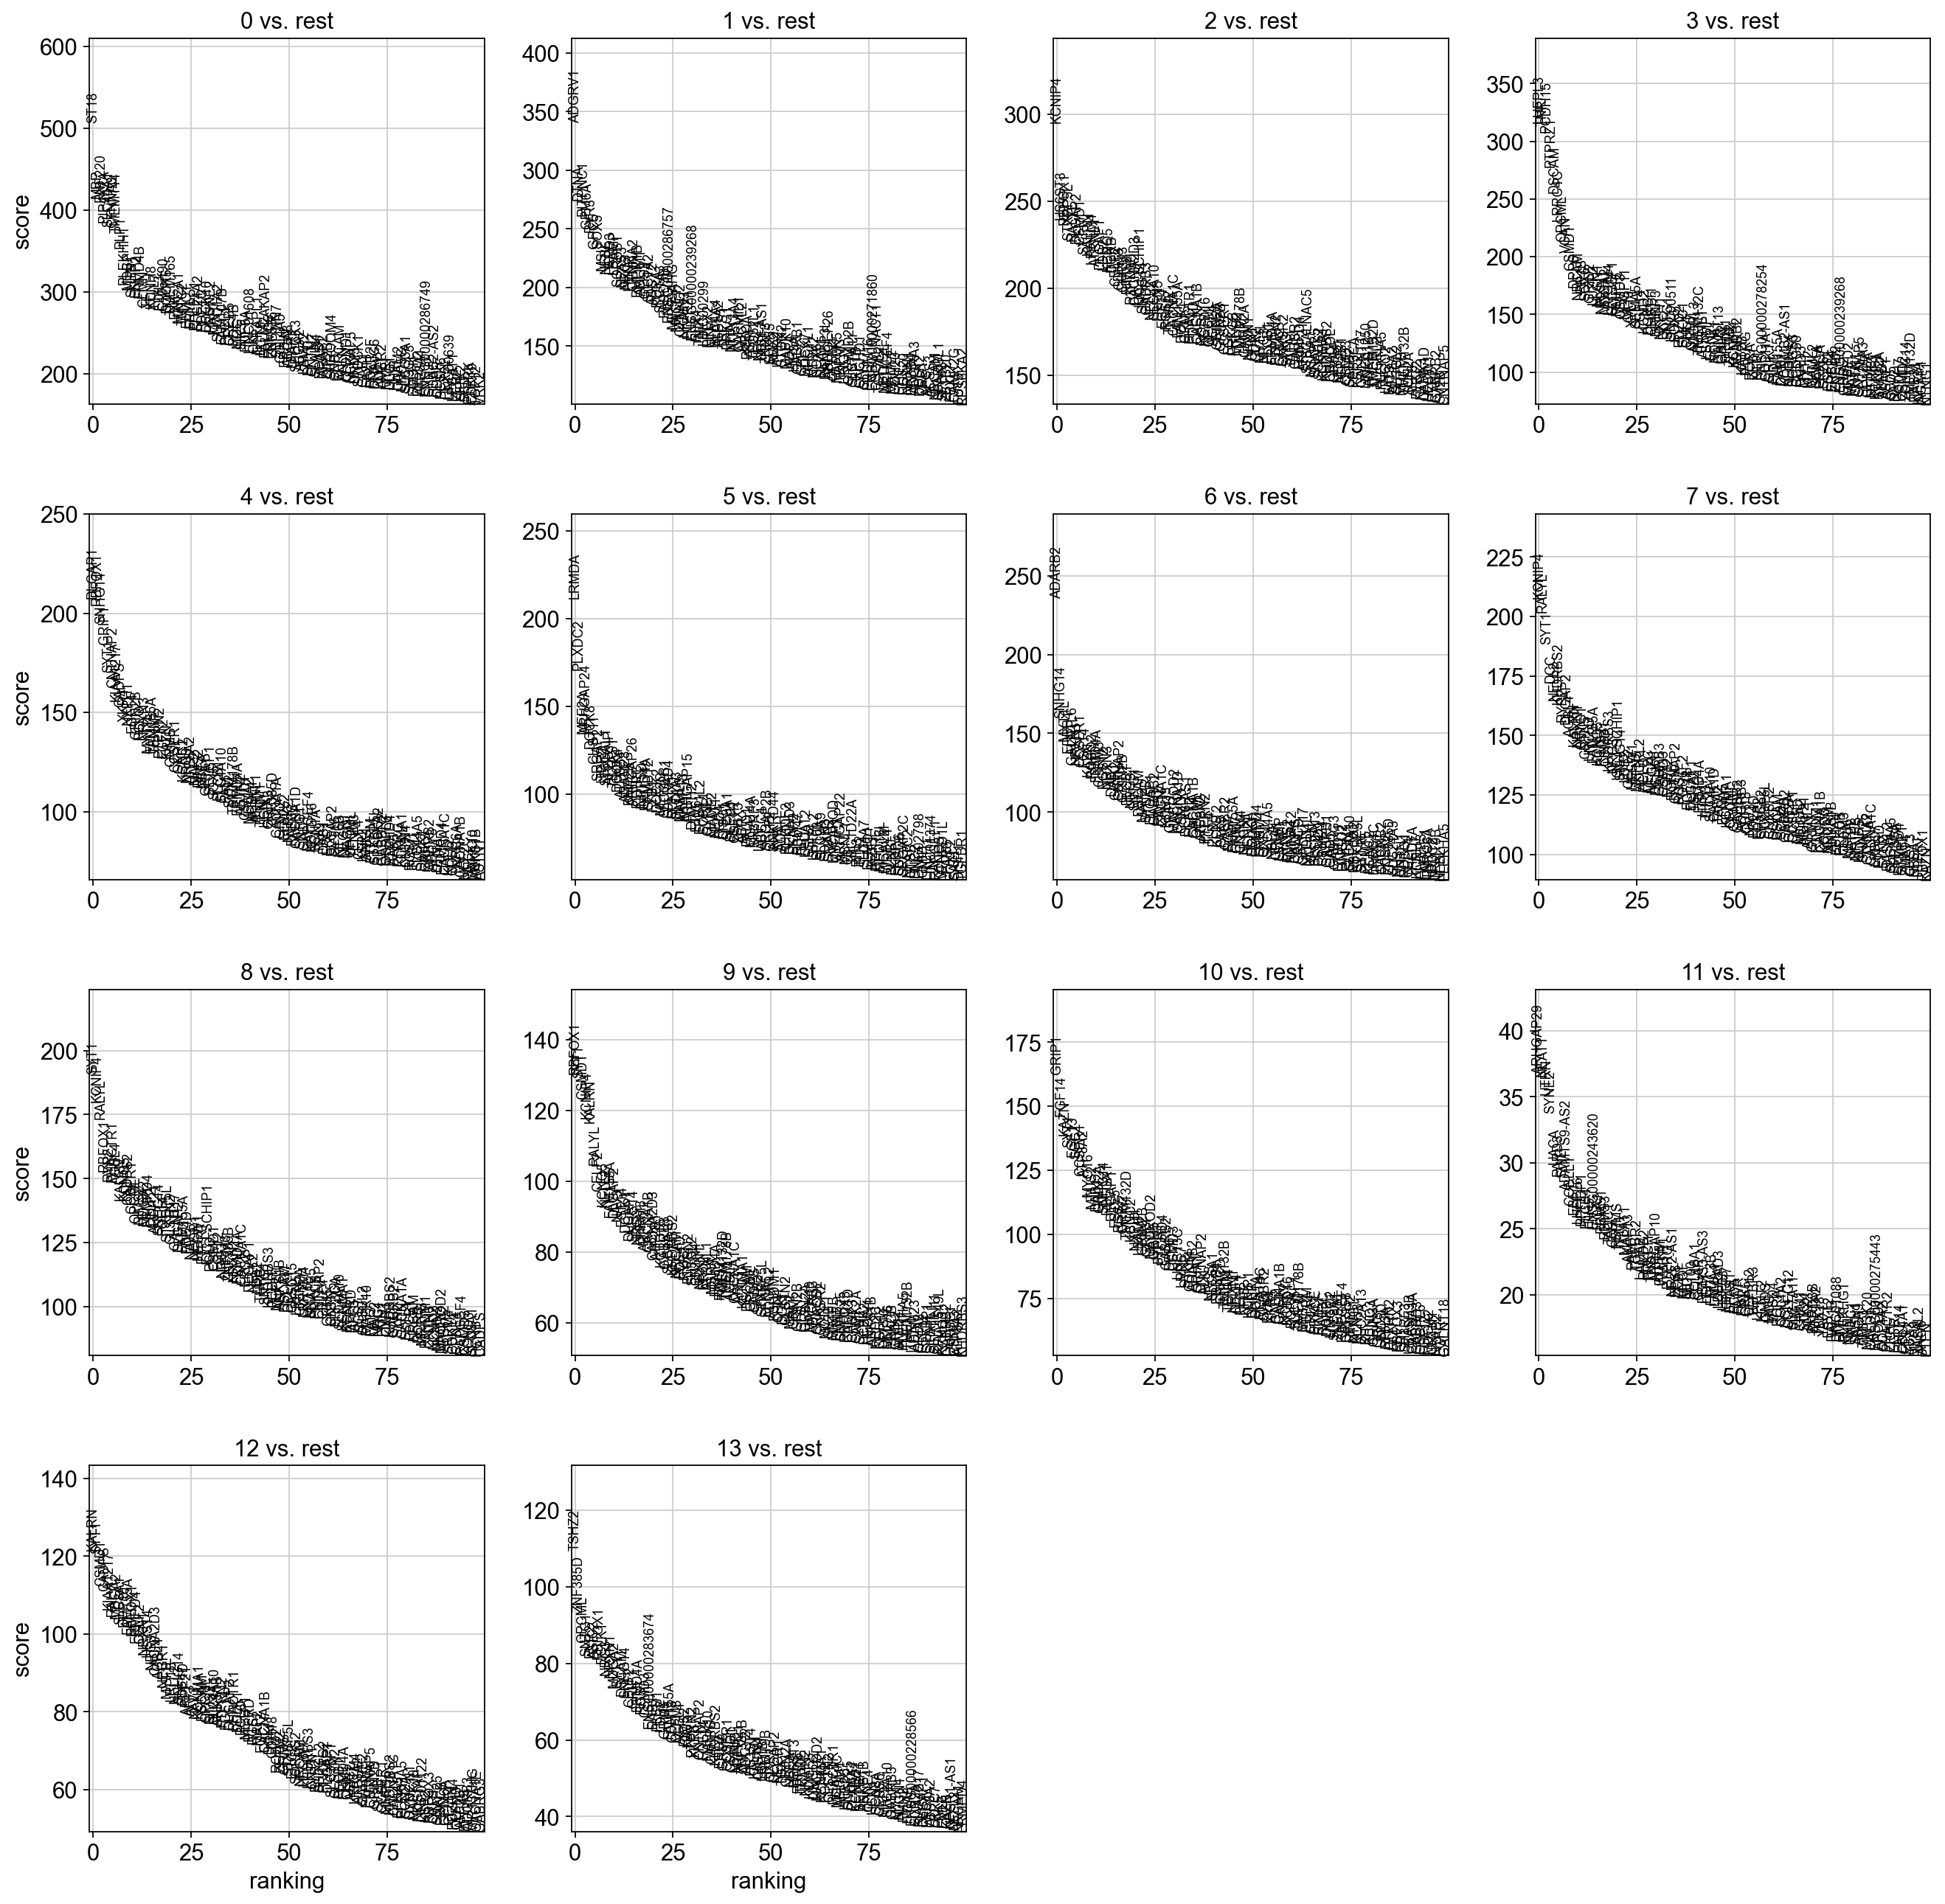

In [6]:
sc.tl.rank_genes_groups(adata, 'leiden_res0_25', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=100, sharey=False)

In [7]:
results = adata.uns['rank_genes_groups']

In [8]:
results['names']['0']

array(['ST18', 'MBP', 'RNF220', 'PIP4K2A', 'SLC44A1', 'CTNNA3', 'TMEM144',
       ..., 'NEBL', 'NRCAM', 'NRXN1', 'FAM155A', 'NRG3', 'CELF2',
       'KCNMA1'], dtype=object)

In [9]:
results['names']['1']

array(['ADGRV1', 'DTNA', 'PITPNC1', 'GPM6A', 'RYR3', 'GPC5', 'SOX5', ...,
       'SH3GL3', 'RAPGEF5', 'MARCHF1', 'SLC24A2', 'ELMO1', 'IL1RAPL1',
       'ANK3'], dtype=object)

In [10]:
results['names']['2']

array(['KCNIP4', 'HS6ST3', 'RBFOX1', 'STXBP5L', 'RALYL', 'DLGAP2',
       'CSMD1', ..., 'ZNF536', 'NEAT1', 'DOCK5', 'ZBTB20', 'DOCK1',
       'NCKAP5', 'QKI'], dtype=object)

In [11]:
results['names']['3']

array(['LHFPL3', 'TNR', 'PCDH15', 'PTPRZ1', 'DSCAM', 'LRRC4C', 'OPCML',
       ..., 'PALM2AKAP2', 'TMEM144', 'GRM3', 'LIMCH1', 'SHTN1', 'MAP7',
       'NKAIN2'], dtype=object)

In [12]:
results['names']['4']

array(['DLGAP1', 'RBFOX1', 'SNHG14', 'GRIP1', 'SYT1', 'CNTNAP2',
       'KIAA1217', ..., 'BCAS1', 'DOCK1', 'TMEM144', 'ARAP2', 'C10orf90',
       'NCKAP5', 'DOCK5'], dtype=object)

In [13]:
results['names']['5']

array(['LRMDA', 'PLXDC2', 'MEF2A', 'ARHGAP24', 'DOCK8', 'CHST11',
       'SRGAP2', ..., 'COBL', 'PHACTR3', 'PCDH9', 'NCAM1', 'GRID1',
       'MAGI2', 'PPP2R2B'], dtype=object)

In [14]:
results['names']['6']

array(['ADARB2', 'SNHG14', 'MYT1L', 'ERBB4', 'GALNTL6', 'NRXN1', 'CCSER1',
       ..., 'RFTN2', 'GAB1', 'COL4A5', 'C10orf90', 'PIP4K2A', 'DAAM2',
       'DOCK5'], dtype=object)

In [15]:
results['names']['7']

array(['KCNIP4', 'RALYL', 'SYT1', 'DCC', 'NELL2', 'KHDRBS2', 'RYR2', ...,
       'ZNF536', 'NCKAP5', 'DOCK5', 'PDE4B', 'SPOCK3', 'DOCK10', 'QKI'],
      dtype=object)

In [16]:
results['names']['8']

array(['SYT1', 'KCNIP4', 'RALYL', 'RBFOX1', 'RYR2', 'PHACTR1', 'AGBL4',
       ..., 'NCKAP5', 'ZNF536', 'DOCK10', 'DOCK1', 'DOCK5', 'QKI',
       'FBXL7'], dtype=object)

In [17]:
results['names']['9']

array(['RBFOX1', 'SYT1', 'CSMD1', 'KCNIP4', 'KALRN', 'RALYL', 'CELF2',
       ..., 'C10orf90', 'GPRC5B', 'ZNF536', 'DOCK1', 'NCKAP5', 'MEGF10',
       'DOCK5'], dtype=object)

In [18]:
results['names'].dtype.names

('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13')

In [19]:
out = np.array([[0,0,0,0,0]])
for group in results['names'].dtype.names:
    out = np.vstack((out,np.vstack((results['names'][group],
                                    results['scores'][group],
                                    results['pvals_adj'][group],
                                    results['logfoldchanges'][group],
                                    np.array([group]*len(results['names'][group])).astype('object'))).T))

In [20]:
out.shape

(488461, 5)

In [21]:
markers = pd.DataFrame(out[1:], columns = ['Genes', 'scores', 'pval_adj', 'lfc', 'cluster'])
#markers = markers[(markers.pval_adj <0.05) & (abs(markers.lfc) > 1)] filtering(Optional)
sorted_markers = markers.sort_values(by='Genes', ascending=True)
sorted_markers[markers.cluster ==  '12']

,Genes,scores,pval_adj,lfc,cluster
439129,5S_rRNA-1,-0.576034,0.677997,-0.440333,12
433233,5S_rRNA-4,0.587361,0.671281,0.549426,12
441670,7SK-1,-1.401754,0.25568,-1.333902,12
427431,A1BG,1.761686,0.138515,1.434373,12
423099,A1BG-AS1,4.269069,0.000073,0.836139,12
...,...,...,...,...,...
430057,ZYG11A,1.140096,0.370473,0.595058,12
421743,ZYG11B,5.984831,0.0,0.380195,12
420497,ZYX,9.116934,0.0,1.32935,12
438407,ZZEF1,-0.400346,0.77903,-0.023683,12


<Axes: xlabel='cluster', ylabel='cluster'>

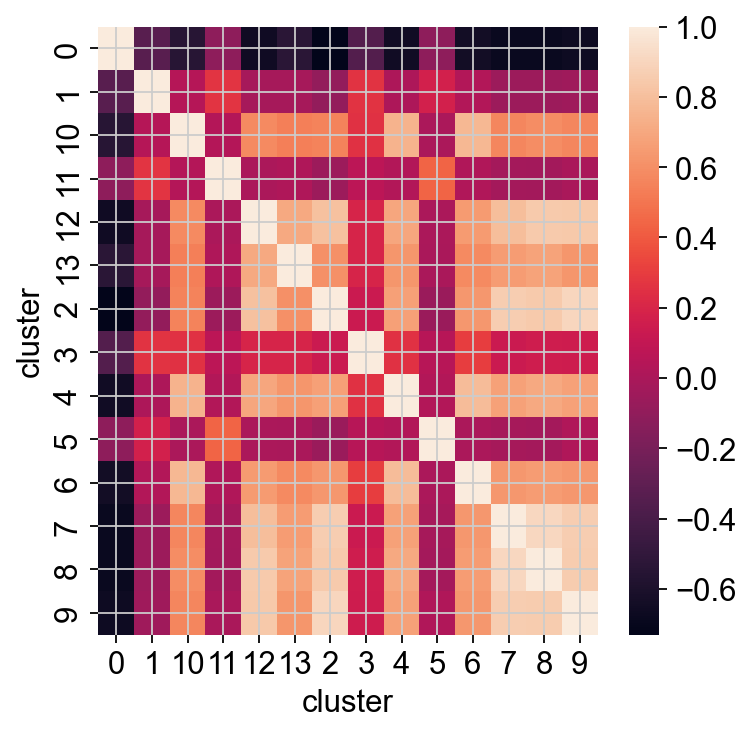

In [22]:
pivoted_data = markers.pivot(index='Genes', columns='cluster', values='scores')
pivoted_data = pivoted_data.fillna(0)
correlation_matrix = pivoted_data.corr()
#print(correlation_matrix)
sns.heatmap(correlation_matrix)

In [23]:
pivoted_data2 = markers.pivot(index='Genes', columns='cluster', values='scores')
pivoted_data2


cluster,0,1,10,11,12,13,2,3,4,5,6,7,8,9
Genes,,,,,,,,,,,,,,
5S_rRNA-1,-2.552849,1.042698,-1.093641,-9.813965,-0.576034,-9.813839,2.098093,-0.546315,1.841424,-3.162964,1.156112,0.994964,0.263538,0.305249
5S_rRNA-4,-3.887746,0.853601,1.251618,1.419882,0.587361,0.965492,0.531836,-0.019718,1.79561,-7.316277,1.776411,0.499727,-0.564005,-0.969134
7SK-1,-3.557155,0.018089,1.818356,0.700778,-1.401754,0.18436,1.675753,0.309555,-0.281748,-0.065886,-0.725266,1.264009,0.798465,0.504425
A1BG,-2.690458,-3.275324,0.968718,0.430101,1.761686,0.975989,3.459191,-10.516745,-0.057496,-3.608944,3.010441,0.0741,1.263058,2.106716
A1BG-AS1,5.147587,-29.023655,1.928637,-1.696758,4.269069,1.429849,10.900247,-23.628733,-5.526975,-2.514757,2.150678,2.478638,-0.41547,7.199138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-4.933031,1.712035,-0.393338,-0.142581,1.140096,0.997654,2.217704,0.351108,-0.781977,-1.787955,4.877243,0.872953,-0.98528,0.052115
ZYG11B,-26.575663,-15.222218,11.699126,-1.395959,5.984831,5.767972,18.329721,0.321929,18.504854,-1.885267,19.063396,16.588768,15.050628,5.763405
ZYX,-27.982367,-5.967816,1.728053,3.817647,9.116934,6.833982,14.894918,-3.828571,9.982603,4.912548,0.966161,11.298544,10.791479,12.024946


cluster            0          1         10        11        12        13  \
Genes                                                                      
5S_rRNA-1  -2.552849   1.042698  -1.093641 -9.813965 -0.576034 -9.813839   
5S_rRNA-4  -3.887746   0.853601   1.251618  1.419882  0.587361  0.965492   
7SK-1      -3.557155   0.018089   1.818356  0.700778 -1.401754  0.184360   
A1BG       -2.690458  -3.275324   0.968718  0.430101  1.761686  0.975989   
A1BG-AS1    5.147587 -29.023655   1.928637 -1.696758  4.269069  1.429849   
...              ...        ...        ...       ...       ...       ...   
ZYG11A     -4.933031   1.712035  -0.393338 -0.142581  1.140096  0.997654   
ZYG11B    -26.575663 -15.222218  11.699126 -1.395959  5.984831  5.767972   
ZYX       -27.982367  -5.967816   1.728053  3.817647  9.116934  6.833982   
ZZEF1       1.314121  -1.487153  -0.561080  0.793880 -0.400346 -0.661919   
ZZZ3       51.616261 -26.537560  -8.514659 -4.364519 -9.043785 -3.380354   

cluster    

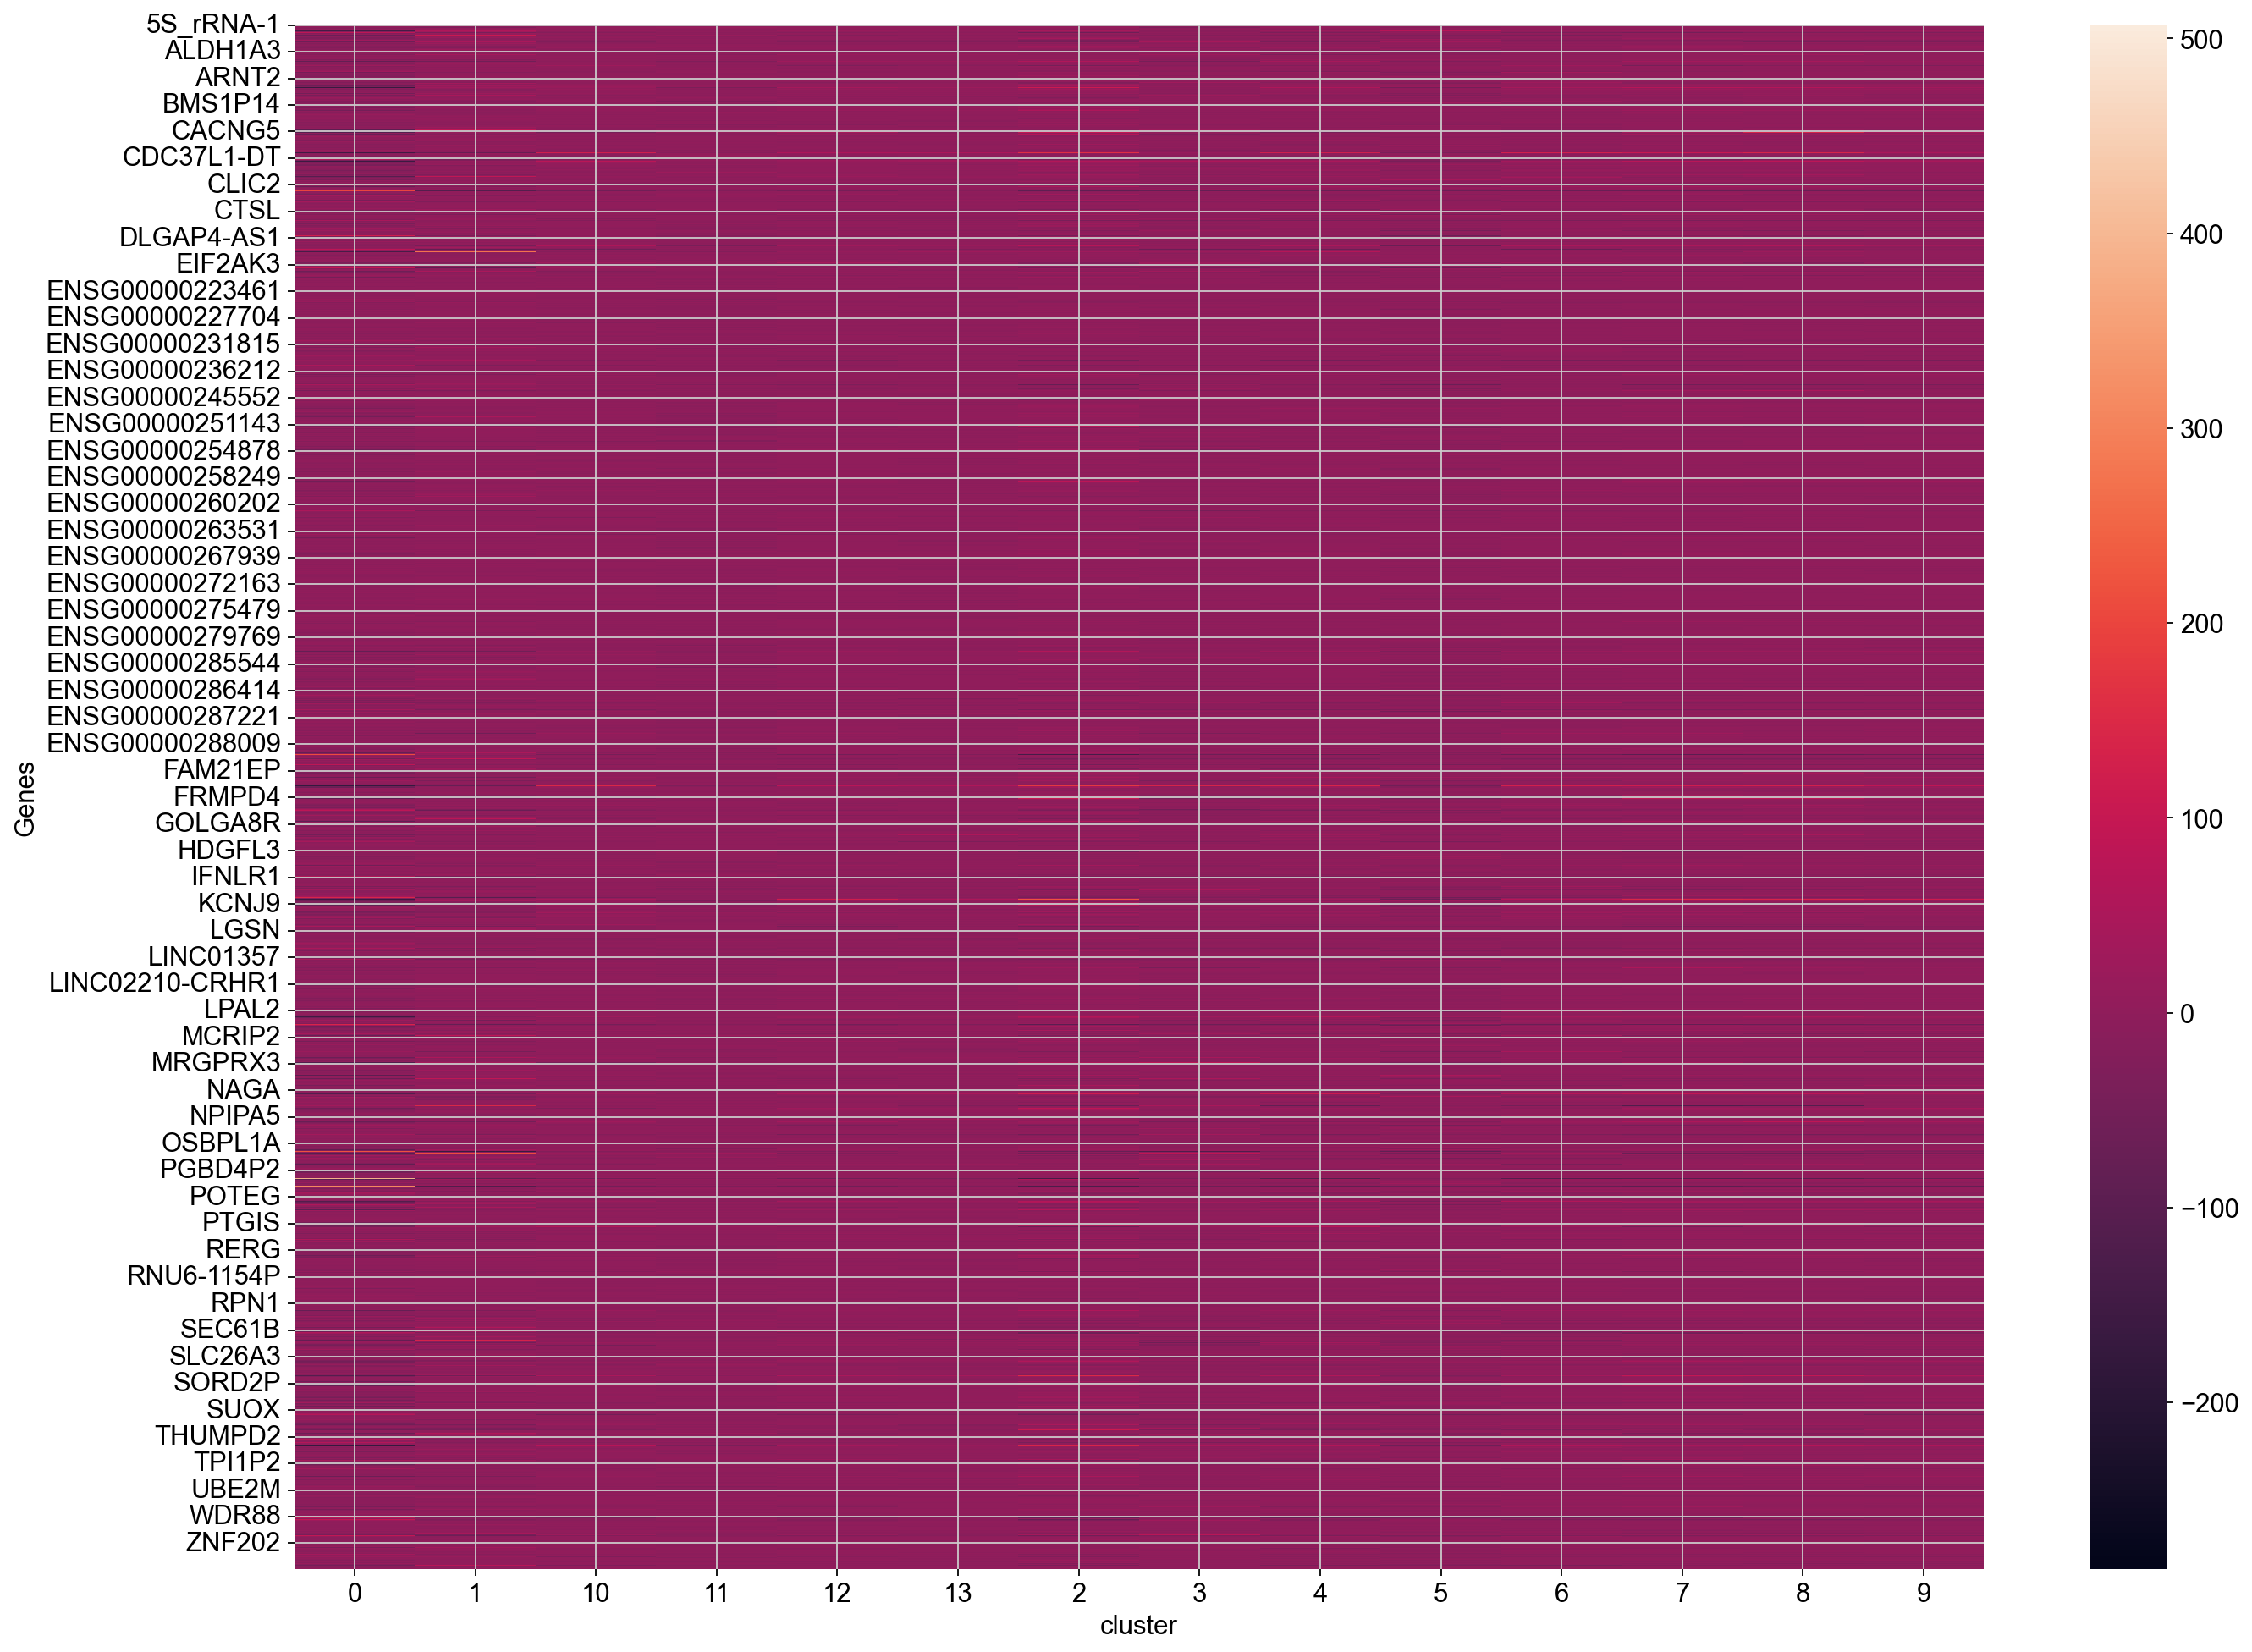

In [24]:
pivoted_data2 = markers.pivot(index='Genes', columns='cluster', values='scores')
#pivoted_data2 = pivoted_data2.set_index('Gene', inplace=True)
pivoted_data2 = pivoted_data2.fillna(0)
print(pivoted_data2)
plt.figure(figsize=(20,15))
sns.heatmap(pivoted_data2)
plt.show()

In [25]:
pivoted_data2.to_csv('output_0.csv')

In [26]:
sc.tl.rank_genes_groups(
    adata, groupby="leiden_res0_25", method="wilcoxon", key_added="dea_leiden_res0_25"
)

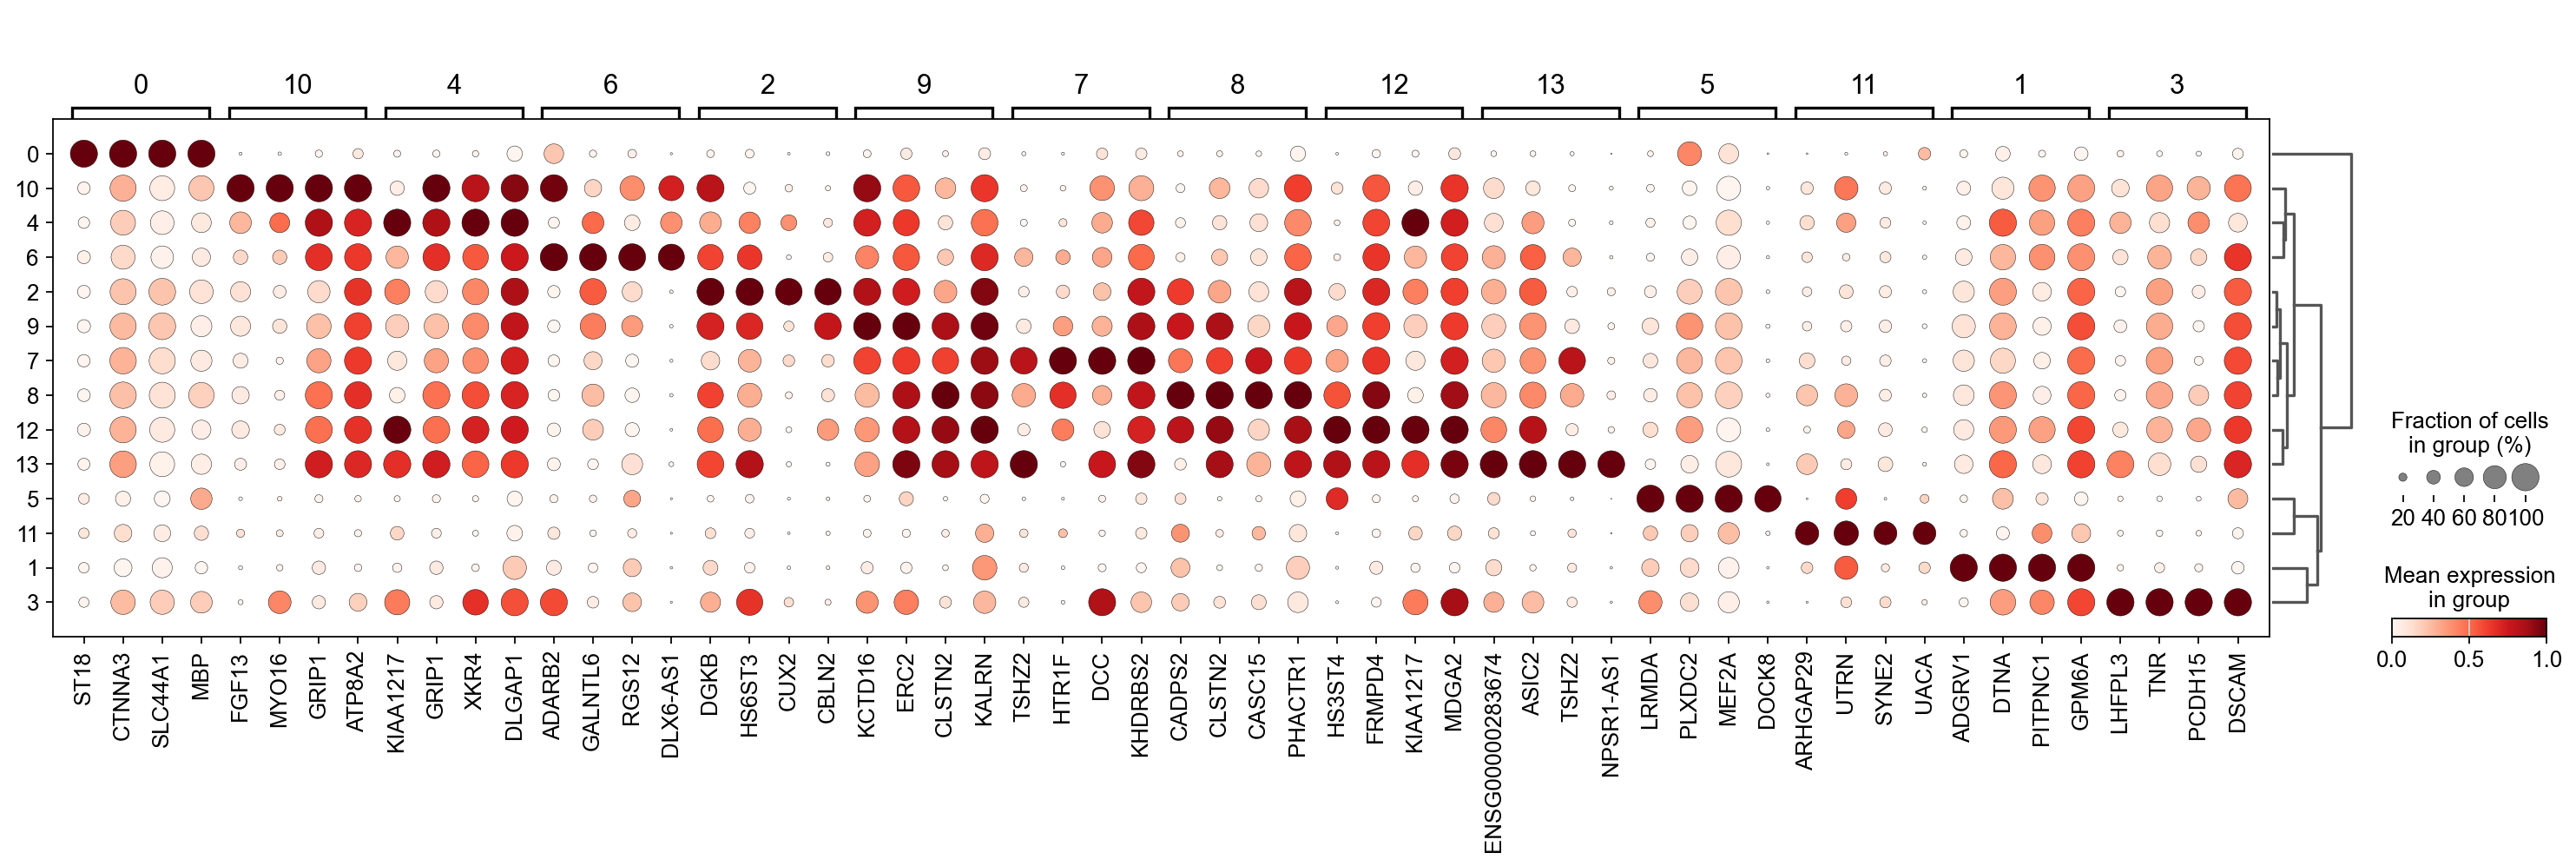

In [27]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_res0_25", standard_scale="var", n_genes=4, key="dea_leiden_res0_25"
)